<a href="https://colab.research.google.com/github/iashishpatel/Natural-language-processing/blob/main/Bag_Of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

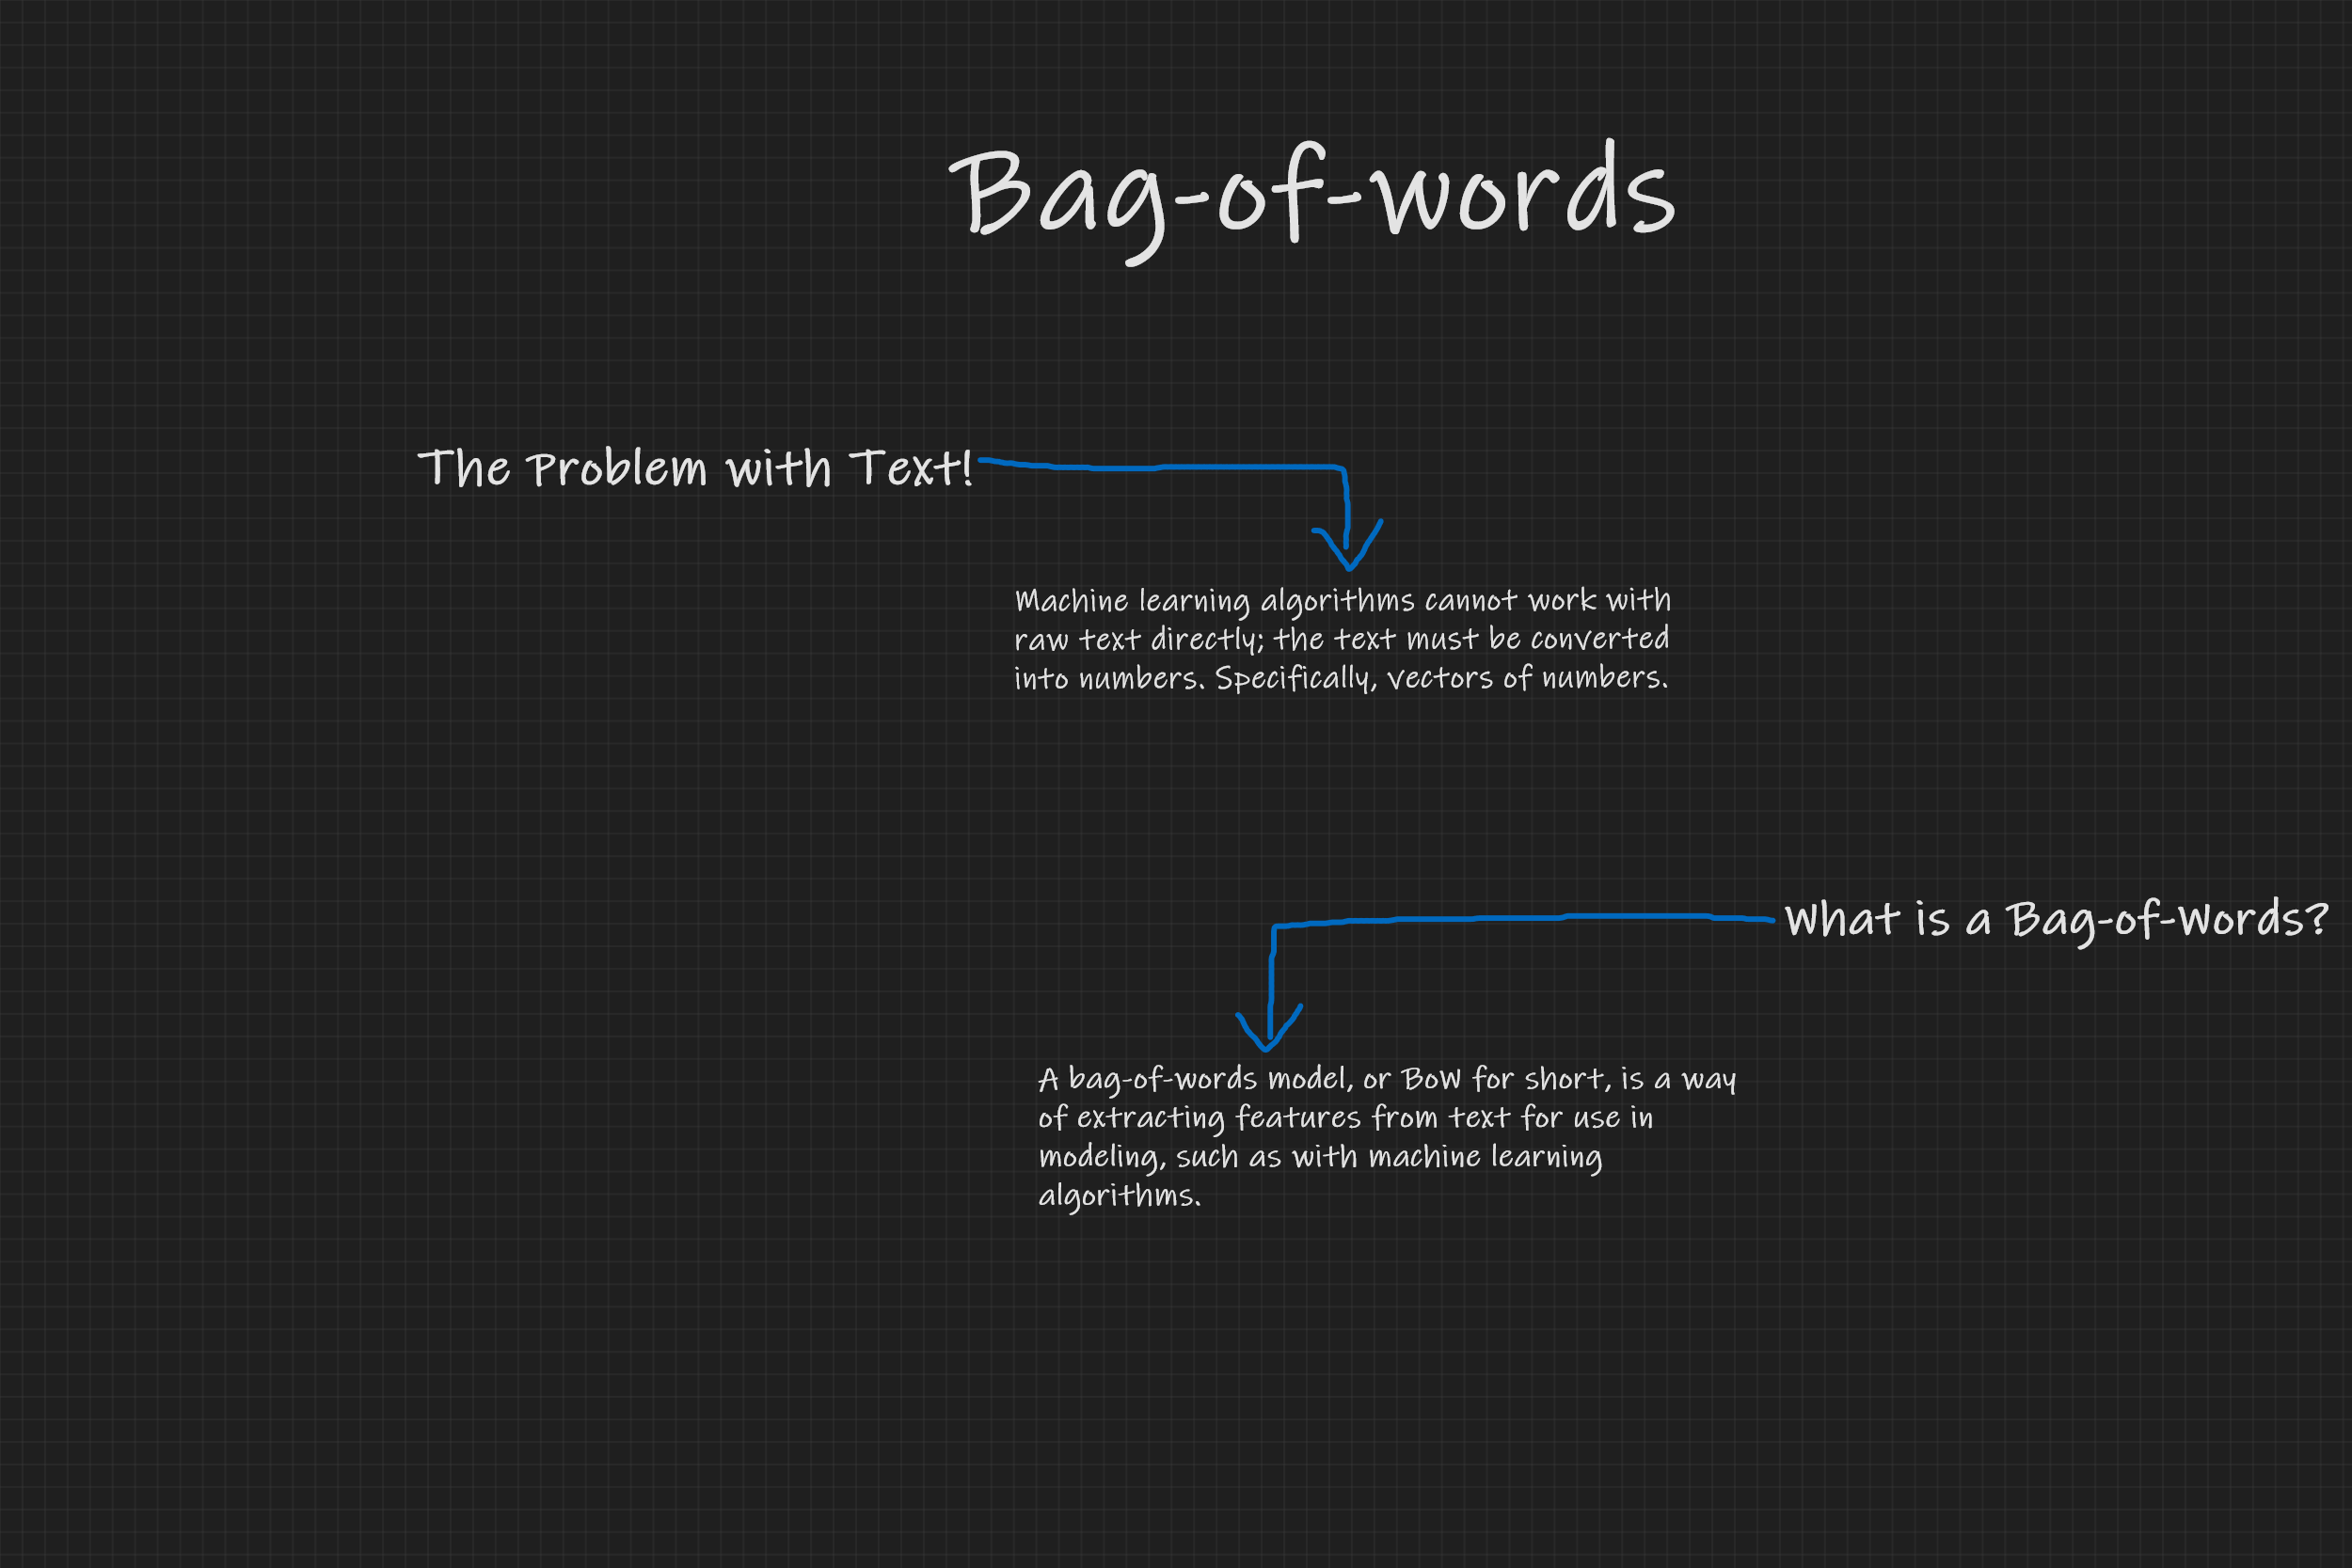

# Importing Libraries

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd

# Creating New Dataset

In [3]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t")
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Finding missing values in dataset 

In [4]:
dataset.isnull().sum()


Review    0
Liked     0
dtype: int64

# Data Cleaning

In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset["Review"][i])
    review = review.lower()
    review = review.split()
    all_words = stopwords.words('english')
    all_words.remove('not')
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Applying bag-of-words model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
newdataset = cv.fit_transform(corpus).toarray()
newdataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Train model with Naive Bayes 

In [7]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(newdataset,dataset['Liked'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
msg = ['hi good performence ashish!']
msg1 = cv.transform(msg)
print(classifier.predict(msg1))

[1]
